<pre>
1. Download the data.

2. Code the model to classify data like below image

<img src='https://i.imgur.com/33ptOFy.png'>

3. Write your own callback function, that has to print the micro F1 score and AUC score after each epoch.

4. Save your model at every epoch if your validation accuracy is improved from previous epoch. 

5. you have to decay learning based on below conditions 
        Cond1. If your validation accuracy at that epoch is less than previous epoch accuracy, you have to decrese the
               learning rate by 10%. 
        Cond2. For every 3rd epoch, decay your learning rate by 5%.
        
6. If you are getting any NaN values(either weigths or loss) while training, you have to terminate your training. 

7. You have to stop the training if your validation accuracy is not increased in last 2 epochs.

8. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)

9. use cross entropy as loss function

10. Try the architecture params as given below. 
</pre>

<pre>
<b>Model-1</b>
<pre>
1. Use tanh as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-2</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-3</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use he_uniform() as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-4</b>
<pre>
1. Try with any values to get better accuracy/f1 score.  
</pre>
</pre>

In [1]:
import os
import numpy as np
import random as rn
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense,Input,Activation, BatchNormalization, Dropout, Flatten, MaxPooling1D

tf.keras.backend.clear_session()

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#data = pd.read_csv('/content/drive/MyDrive/20 Working with Callbacks/Callbacks/data.csv')

In [4]:
data = pd.read_csv('data.csv')

data_features = data.copy()
data_labels = data_features.pop('label')

In [5]:
data

,f1,f2,label
0,0.450564,1.074305,0.0
1,0.085632,0.967682,0.0
2,0.117326,0.971521,1.0
3,0.982179,-0.380408,0.0
4,-0.720352,0.955850,0.0
...,...,...,...
19995,-0.491252,-0.561558,0.0
19996,-0.813124,0.049423,1.0
19997,-0.010594,0.138790,1.0
19998,0.671827,0.804306,0.0


In [6]:
n_features = len(data_features.columns)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_features, data_labels, train_size=0.85)

In [8]:
list(set(list(data.label)))

[0.0, 1.0]

In [9]:
data_features

,f1,f2
0,0.450564,1.074305
1,0.085632,0.967682
2,0.117326,0.971521
3,0.982179,-0.380408
4,-0.720352,0.955850
...,...,...
19995,-0.491252,-0.561558
19996,-0.813124,0.049423
19997,-0.010594,0.138790
19998,0.671827,0.804306


### Implementing Callbacks

**1. Loss History**

In [10]:
#Reference:Call_Backs_Reference.ipynb from AAIC

class LossHistory(tf.keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'loss': [],'acc': [],'val_loss': [],'val_acc': []}
        
    def on_epoch_end(self, epoch, logs={}):
        ## on end of each epoch, we will get logs and update the self.history dict
        self.history['loss'].append(logs.get('loss'))
        self.history['acc'].append(logs.get('acc'))
        if logs.get('val_loss', -1) != -1:
            self.history['val_loss'].append(logs.get('val_loss'))
        if logs.get('val_acc', -1) != -1:
            self.history['val_acc'].append(logs.get('val_acc'))
            
history_own=LossHistory()  

**STEP 03.** Write  callback function, that has to print the micro F1 score and AUC score after each epoch.


**2. ROC-AUC Curve**

In [11]:
#Reference:https://stackoverflow.com/questions/59666138/sklearn-roc-auc-score-with-multi-class-ovr-should-have-none-average-available
#Code Reference: https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
#Reference:https://learning.oreilly.com/library/view/deep-learning-quick/9781788837996/a22485be-e397-4b46-86b2-29b7878953f5.xhtml#:~:text=Let's%20use%20one%20more%20callback,Keras%20is%20actually%20really%20simple.

from sklearn.metrics import roc_auc_score
from tensorflow.keras.callbacks import Callback
class RocCallback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_epoch_end(self, epoch, logs={}):
     
        #y_pred_train = np.argmax(model.predict(X_train),axis=1)
        y_pred_train = model.predict(self.x)
        roc_train = roc_auc_score(self.y, y_pred_train, average='weighted')

        y_pred_val = model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val, average='weighted')
        print('\nROC-AUC Train: %s - ROC-AUC Test: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return


ROC_AUC = RocCallback(training_data=(X_train, Y_train),
                  validation_data=(X_test, Y_test))


**3.F1 Score**

In [12]:
#Reference:https://stackoverflow.com/questions/59666138/sklearn-roc-auc-score-with-multi-class-ovr-should-have-none-average-available
#Code Reference: https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
#Reference:https://learning.oreilly.com/library/view/deep-learning-quick/9781788837996/a22485be-e397-4b46-86b2-29b7878953f5.xhtml#:~:text=Let's%20use%20one%20more%20callback,Keras%20is%20actually%20really%20simple.

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class F1Score(Callback):
    #Using __init__ method to access training and validation data
    def __init__(self, Xtrain, y_train_encoded, Xtest, y_test_encoded):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test       

    def on_epoch_end(self, epoch, logs={}):

 
        y_pred_train = model.predict_classes(self.X_train)
        #for milticlass classification need set average other than binary
        F1Score_train = f1_score(self.Y_train, y_pred_train, average='binary',sample_weight=None, zero_division=0)


        y_pred_test = model.predict_classes(self.X_test)
        F1Score_test = f1_score(self.Y_test, y_pred_test, average='binary',sample_weight=None, zero_division=0)
        
        print('\nTraining F1-Score: %s - Testing F1-Score: %s' % (str(round(F1Score_train,5)),str(round(F1Score_test,5))),end=100*' '+'\n')
        return


F1Score = F1Score(X_train, Y_train,
                  X_test, Y_test)


**STEP 04.** Save your model at every epoch if your validation accuracy is improved from previous epoch.

**4.Model Checkpoint**

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath="model_autosaved/model.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, save_weights_only=True, 
                             monitor='val_accuracy',  verbose=1, 
                             save_best_only=True, mode='auto')

**STEP 05.** you have to decay learning based on below conditions 
- Cond1. If your validation accuracy at that epoch is less than previous epoch accuracy, you have to decrese the learning rate by 10%. 
- Cond2. For every 3rd epoch, decay your learning rate by 5%.

Cond1: **ReduceLROnPlateau**
   
   
   If your validation accuracy at that epoch is less than previous epoch accuracy, you have to decrese the learning rate by 10%.

In [14]:
decay_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy', factor=0.9, patience=2, verbose=1,
            mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)

Cond2: **LearningRateScheduler**

For every 3rd epoch, decay your learning rate by 5%.

In [15]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [16]:
#https://stackoverflow.com/questions/39779710/setting-up-a-learningratescheduler-in-keras

def scheduler(epoch, lr):
    if epoch % 3 ==0:
        return lr*0.95
    else:
        return lr
    
lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

**STEP 06.** If you are getting any NaN values(either weigths or loss) while training, you have to terminate your training.

In [17]:
#Reference:Call_Backs_Reference.ipynb from AAIC
class TerminateNaN(tf.keras.callbacks.Callback):    
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get('loss')
        if loss is not None:
            if np.isnan(loss) or np.isinf(loss):
                print("Invalid loss and terminated at epoch {}".format(epoch))
                self.model.stop_training = True
                
terminate_NaN = TerminateNaN()

**STEP 07.** You have to stop the training if your validation accuracy is not increased in last 2 epochs.

**Earlystopping**

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
earlystop_accuracy = EarlyStopping(monitor='val_accuracy', min_delta=0.35, patience=2, verbose=1)

**STEP 08.** Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)

**Tensorboard**

In [20]:
import tensorflow as tf
import datetime

In [21]:
#Reference:https://www.tensorflow.org/tensorboard/get_started

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
#rm -rf ./logs/

#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

In [22]:
%reload_ext tensorboard

In [23]:
#%tensorboard --logdir logs/

In [24]:
#callback_list = [ROC_AUC, F1Score, checkpoint, decay_lr, lr_scheduler, terminate_NaN, earlystop_accuracy, tensorboard_callback ]

<b>Model-1</b>
<pre>
1. Use tanh as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>

In [25]:
tf.keras.backend.clear_session()

In [26]:
from tensorflow.keras import Sequential

model_1 = Sequential()
model_1.add(Dense(200, activation='tanh', kernel_initializer= tf.keras.initializers.RandomUniform(0,1), input_shape=(n_features,)))
model_1.add(Dense(50, activation='tanh', kernel_initializer= tf.keras.initializers.RandomUniform(0,1)))
model_1.add(Dense(20, activation='tanh', kernel_initializer= tf.keras.initializers.RandomUniform(0,1)))
model_1.add(Dense(10, activation='tanh', kernel_initializer= tf.keras.initializers.RandomUniform(0,1)))
model_1.add(Dense(1))

print(model_1.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 11,891
Trainable params: 11,891
Non-trainable params: 0
_________________________________________________________________
None


Architecture:


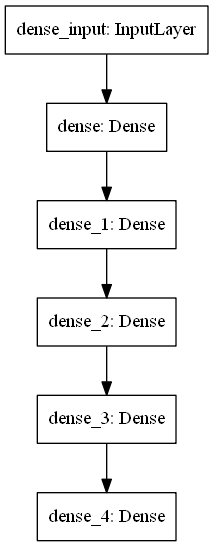

In [27]:
model = model_1

print('Architecture:')
plot_model(model, to_file='Model_1.png', show_shapes=False, dpi = 96 )

In [28]:
model = model_1

optimizer_SGD = tf.keras.optimizers.SGD(
    learning_rate=0.001, momentum=0.9, nesterov=True, name='SGD')

filepath="model_autosaved/model_1.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, save_weights_only=True, 
                             monitor='val_accuracy',  verbose=1, 
                             save_best_only=True, mode='auto')


decay_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy', factor=0.9, patience=2, verbose=1,
            mode='auto', min_delta=0.001, cooldown=0, min_lr=0.0001)

earlystop_accuracy = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=2, verbose=1)


#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_1", histogram_freq=1)

callback_list = [ROC_AUC, F1Score, checkpoint, decay_lr, 
                 lr_scheduler, terminate_NaN, earlystop_accuracy, 
                 tensorboard_callback ]

# compile the model
model.compile(optimizer= optimizer_SGD, loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), batch_size=200,  
          callbacks= callback_list)



Epoch 00001: LearningRateScheduler reducing learning rate to 0.0009500000451225787.
Epoch 1/100
 1/85 [..............................] - ETA: 0s - loss: 4.9961 - accuracy: 0.4300WARNING:tensorflow:From C:\Users\asd\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
63/85 [=====================>........] - ETA: 0s - loss: 4.2459 - accuracy: 0.4954
ROC-AUC Train: 0.4995 - ROC-AUC Test: 0.4888                                                                                                    
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` las

In [29]:
#%tensorboard --logdir logs/

__________

<pre>
<b>Model-2</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>

In [30]:
model_2 = Sequential()
model_2.add(Dense(20, activation='relu', kernel_initializer= tf.keras.initializers.RandomUniform(0,1), input_shape=(n_features,)))
model_2.add(Dense(15, activation='relu', kernel_initializer= tf.keras.initializers.RandomUniform(0,1)))
model_2.add(Dense(8, activation='relu', kernel_initializer= tf.keras.initializers.RandomUniform(0,1)))
model_2.add(Dense(4, activation='relu', kernel_initializer= tf.keras.initializers.RandomUniform(0,1)))
model_2.add(Dense(1))

print(model_2.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model = model_2

optimizer_SGD = tf.keras.optimizers.SGD(
    learning_rate=0.001, momentum=0.9, nesterov=False, name='SGD')

filepath="model_autosaved/model_2.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, save_weights_only=True, 
                             monitor='val_accuracy',  verbose=1, 
                             save_best_only=True, mode='auto')

decay_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy', factor=0.9, patience=2, verbose=1,
            mode='auto', min_delta=0.001, cooldown=0, min_lr=0.001)

earlystop_accuracy = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=2, verbose=1)

#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_2", histogram_freq=1)

callback_list = [ROC_AUC, F1Score, checkpoint, decay_lr, 
                 lr_scheduler, terminate_NaN, earlystop_accuracy, 
                 tensorboard_callback ]

# compile the model
model.compile(optimizer= optimizer_SGD, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), batch_size=200,  
          callbacks= callback_list)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0009500000451225787.
Epoch 1/100
83/85 [============================>.] - ETA: 0s - loss: 7.7208 - accuracy: 0.4995
ROC-AUC Train: 0.532 - ROC-AUC Test: 0.5387                                                                                                    

Training F1-Score: 0.0 - Testing F1-Score: 0.0                                                                                                    

Epoch 00001: val_accuracy improved from -inf to 0.50967, saving model to model_autosaved\model_2.hdf5
85/85 [==============================] - 3s 33ms/step - loss: 7.7388 - accuracy: 0.4983 - val_loss: 7.5634 - val_accuracy: 0.5097

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009500000160187483.
Epoch 2/100
68/85 [=======================>......] - ETA: 0s - loss: 7.7227 - accuracy: 0.4993
ROC-AUC Train: 0.532 - ROC-AUC Test: 0.5387                                                                        

In [32]:
#%tensorboard --logdir logs/

___________

<pre>
<b>Model-3</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use he_uniform() as initilizer.
3. Analyze your output and training process. 
</pre>

In [33]:
model_3 = Sequential()
model_3.add(Dense(10, activation='relu', kernel_initializer= tf.keras.initializers.he_uniform(), input_shape=(n_features,)))
model_3.add(Dense(8, activation='relu', kernel_initializer= tf.keras.initializers.he_uniform()))
model_3.add(Dense(6, activation='relu', kernel_initializer= tf.keras.initializers.he_uniform()))
model_3.add(Dense(4, activation='relu', kernel_initializer= tf.keras.initializers.he_uniform()))
model_3.add(Dense(1))

print(model_3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
model = model_3

optimizer_SGD = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=True, name='SGD')

filepath="model_autosaved/model_3.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, save_weights_only=True, 
                             monitor='val_accuracy',  verbose=1, 
                             save_best_only=True, mode='auto')

decay_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy', factor=0.9, patience=1, verbose=1,
            mode='auto', min_delta=0.001, cooldown=0, min_lr=0.001)

earlystop_accuracy = EarlyStopping(monitor='val_accuracy', min_delta=0.35, patience=2, verbose=1)


#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_3", histogram_freq=1)

callback_list = [ROC_AUC, F1Score, checkpoint, decay_lr, 
                 lr_scheduler, terminate_NaN, earlystop_accuracy, 
                 tensorboard_callback ]

# compile the model
model.compile(optimizer= optimizer_SGD, loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), batch_size=200,  
          callbacks = callback_list)



Epoch 00001: LearningRateScheduler reducing learning rate to 0.009499999787658453.
Epoch 1/100
84/85 [============================>.] - ETA: 0s - loss: 0.7847 - accuracy: 0.4973
ROC-AUC Train: 0.5009 - ROC-AUC Test: 0.5007                                                                                                    

Training F1-Score: 0.66818 - Testing F1-Score: 0.65802                                                                                                    

Epoch 00001: val_accuracy improved from -inf to 0.49033, saving model to model_autosaved\model_3.hdf5
85/85 [==============================] - 3s 36ms/step - loss: 0.7837 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.4903

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009499999694526196.
Epoch 2/100
81/85 [===========================>..] - ETA: 0s - loss: 0.6932 - accuracy: 0.5007
ROC-AUC Train: 0.5028 - ROC-AUC Test: 0.5024                                                                

In [35]:
#%tensorboard --logdir logs/

___________

<pre>
<b>Model-4</b>
<pre>
1. Try with any values to get better accuracy/f1 score.  
</pre>
</pre>

In [36]:
def scheduler(epoch, lr):
    if epoch != 1 and epoch % 3 ==0:
        return lr*0.95
    else:
        return lr
    
lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

In [37]:
model_4 = Sequential()
model_4.add(Dense(40, activation='relu', kernel_initializer= tf.keras.initializers.he_uniform(), input_shape=(n_features,)))
model_4.add(Dense(10, activation='relu', kernel_initializer= tf.keras.initializers.he_uniform()))
model_4.add(Dropout(0.2))
model_4.add(Dense(5, activation='relu', kernel_initializer= tf.keras.initializers.he_uniform()))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Dense(4, activation='sigmoid', kernel_initializer= tf.keras.initializers.he_uniform()))
model_4.add(Dense(1))

print(model_4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 40)                120       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                410       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 55        
_________________________________________________________________
batch_normalization (BatchNo (None, 5)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 4)                

Let's try with different optimizers

In [38]:
optimizer_SGD = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.9, nesterov=True, 
    name='SGD')

optimizer_aadam = tf.keras.optimizers.Adam(
    learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True,
    name='Adam')

optimizer_adamax = tf.keras.optimizers.Adamax(
    learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Adamax')

optimizer_RMSprop = tf.keras.optimizers.RMSprop(
    learning_rate=0.1, rho=0.9, momentum=0.8, epsilon=1e-07, centered=False,
    name='RMSprop')

optimizer_adagrad = tf.keras.optimizers.Adagrad(
    learning_rate=0.1, initial_accumulator_value=0.1, epsilon=1e-07,
    name='Adagrad')

optimizer_adadelta = tf.keras.optimizers.Adadelta(
    learning_rate=0.1, rho=0.95, epsilon=1e-07, name='Adadelta')

In [39]:
model = model_4

filepath="model_autosaved/model_4.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, save_weights_only=True, 
                             monitor='val_accuracy',  verbose=1, 
                             save_best_only=True, mode='auto')



decay_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy', factor=0.9, patience=2, verbose=1,
            mode='auto', min_delta=0.001, cooldown=0, min_lr=0)

earlystop_accuracy = EarlyStopping(monitor='val_accuracy', min_delta=0.035, patience=10, verbose=1)

#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_4", histogram_freq=1)

callback_list = [ROC_AUC, F1Score, checkpoint, decay_lr, 
                 lr_scheduler, terminate_NaN, earlystop_accuracy, 
                 tensorboard_callback ]




# compile the model
model.compile(optimizer= optimizer_adagrad, loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=200,  
          callbacks=callback_list)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.09500000141561031.
Epoch 1/50
65/85 [=====================>........] - ETA: 0s - loss: 0.7162 - accuracy: 0.5267
ROC-AUC Train: 0.6434 - ROC-AUC Test: 0.6443                                                                                                    

Training F1-Score: 0.30093 - Testing F1-Score: 0.29846                                                                                                    

Epoch 00001: val_accuracy improved from -inf to 0.54400, saving model to model_autosaved\model_4.hdf5
85/85 [==============================] - 3s 39ms/step - loss: 0.7098 - accuracy: 0.5295 - val_loss: 0.6802 - val_accuracy: 0.5440

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0949999988079071.
Epoch 2/50
74/85 [=========================>....] - ETA: 0s - loss: 0.6846 - accuracy: 0.5460
ROC-AUC Train: 0.6959 - ROC-AUC Test: 0.6961                                                                     


Training F1-Score: 0.6954 - Testing F1-Score: 0.69656                                                                                                    

Epoch 00012: val_accuracy did not improve from 0.66700
85/85 [==============================] - 1s 15ms/step - loss: 0.6529 - accuracy: 0.6232 - val_loss: 0.6286 - val_accuracy: 0.6617
Epoch 00012: early stopping


In [42]:
#Reference: https://github.com/tensorflow/tensorboard/issues/2481

#from tensorflow.python.framework import ops
#ops.reset_default_graph()


#logs_base_dir = "./logs"
#os.makedirs(logs_base_dir, exist_ok=True)
#%tensorboard --logdir {logs_base_dir}  --host localhost

In [41]:
%tensorboard --logdir logs/